In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.datasets import mnist

# Load datasset

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


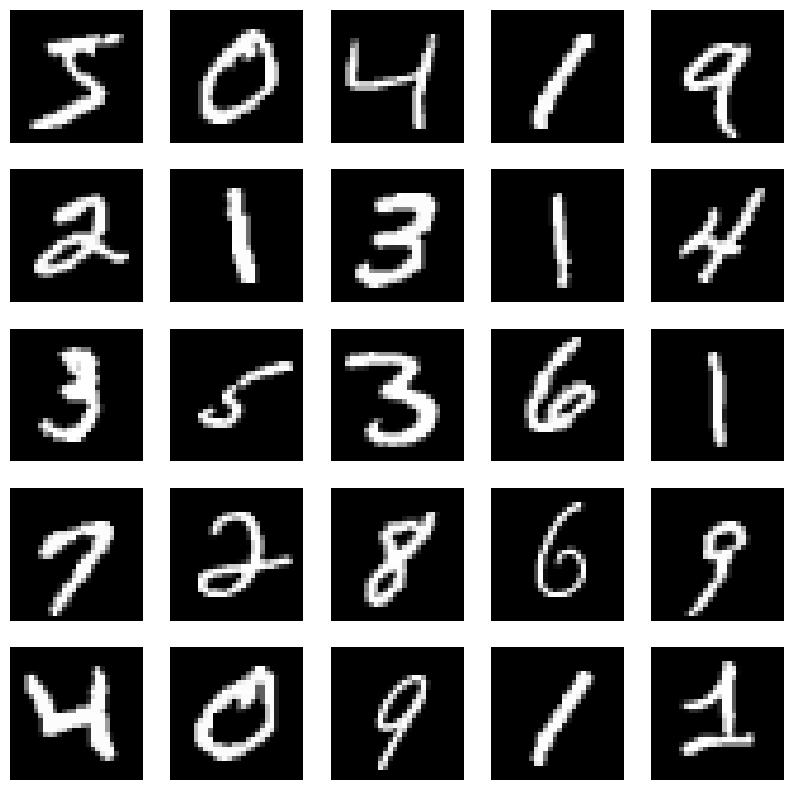

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('off')
plt.show()


# Pre-process data

In [ ]:
img_rows,img_cols=28,28
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
x_test=x_test.astype('float32')/255
x_train=x_train.astype('float32')/255

# One-Hot Encode

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# CNN model

In [ ]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Train the model

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 46s 97ms/step - loss: 2.3016 - accuracy: 0.1104 - val_loss: 2.3143 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 57s 122ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3102 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 55s 118ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3109 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 44s 94ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3115 - val_accuracy: 0.1135
Epoch 5/10
469/469 [==============================] - 47s 99ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3115 - val_accuracy: 0.1135
Epoch 6/10
469/469 [==============================] - 43s 92ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3115 - val_accuracy: 0.1135
Epoch 7/10
469/469 [==============================] - 44s 94ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3107 - val_accurac

# Model Metrics

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])

Test loss: 2.3108935356140137
Test accuracy 0.11349999904632568
